In [65]:
import numpy as np
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
#plt.style.use("seaborn-whitegrid")
import matplotlib.pyplot as plt
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import matplotlib.ticker as mticker

# importing statistics module 
from statistics import variance 

# importing packages from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from scipy.stats.mstats import winsorize

In [ ]:
df=pd.read_csv('/kaggle/input/vimaanbima/train.csv') #loading the train file

In [14]:
dfv=df.drop(columns=['id']) # removing id column from train data as its holds no importance for predicting cltv

In [15]:
# checking for values and missing data

total = dfv.isnull().sum().sort_values(ascending=False)
percent_1 = dfv.isnull().sum()/dfv.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(11)

,Total,%
gender,0,0.0
area,0,0.0
qualification,0,0.0
income,0,0.0
marital_status,0,0.0
vintage,0,0.0
claim_amount,0,0.0
num_policies,0,0.0
policy,0,0.0
type_of_policy,0,0.0


In [16]:
print(dfv.apply(lambda col: col.unique())) # printing unique values in each column

gender                                               [Male, Female]
area                                                 [Urban, Rural]
qualification                       [Bachelor, High School, Others]
income                         [5L-10L, More than 10L, 2L-5L, <=2L]
marital_status                                               [1, 0]
vintage                                 [5, 8, 7, 6, 1, 0, 3, 4, 2]
claim_amount      [5790, 5080, 2599, 0, 3508, 5473, 6105, 4329, ...
num_policies                                       [More than 1, 1]
policy                                                    [A, C, B]
type_of_policy                             [Platinum, Gold, Silver]
cltv              [64308, 515400, 64212, 97920, 59736, 348768, 2...
dtype: object


In [18]:
# Unique Values of each column
dfv.astype('object').describe(include='all').loc['unique', :]

gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount      10889
num_policies          2
policy                3
type_of_policy        3
cltv              18796
Name: unique, dtype: object

**Exploratory Data Analysis (EDA)**

In this section we perform initial investigations on insurance data so as to discover patterns and to check assumptions with the help of summary statistics and graphical representations

In [20]:
dfv['cltv'].describe() # description of cltv- its mean, max,min etc.

count     89392.000000
mean      97952.828978
std       90613.814793
min       24828.000000
25%       52836.000000
50%       66396.000000
75%      103440.000000
max      724068.000000
Name: cltv, dtype: float64

In [23]:
variance(dfv['cltv']) # variance of cltv

8210863431.402371

In [24]:
dfv['cltv'].skew() # skewness of cltv data

2.7530651590601143

In [25]:
dfv['cltv'].kurtosis() # kurtosis of cltv data

8.333802797590577

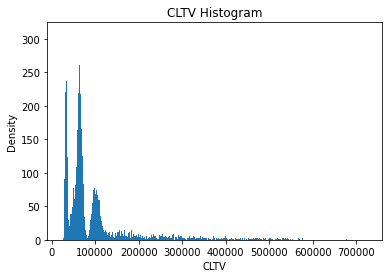

In [28]:
# for printing histogram of cltv with respect to density
bin_amount1 = (max(dfv['cltv']) - min(dfv['cltv'])) / 100
plt.hist(dfv['cltv'], bins=int(round(bin_amount1)))
plt.xlabel('CLTV')
plt.ylabel('Density')
plt.title('CLTV Histogram')
plt.show()

**Descriptive Analysis of claim_amount**

In [30]:
dfv['claim_amount'].describe() # description of claim_amount column

count    89392.000000
mean      4351.502416
std       3262.359775
min          0.000000
25%       2406.000000
50%       4089.000000
75%       6094.000000
max      31894.000000
Name: claim_amount, dtype: float64

In [31]:
variance(dfv['claim_amount']) # claim_amount variance

10642991.302787507

In [32]:
dfv['claim_amount'].skew() # claim_amount skewness

1.0442327522818384

In [33]:
dfv['claim_amount'].kurtosis() # claim_amount kurtosis

3.231535360159971

In [57]:
dfv['claim_amount'].corr(dfv['cltv']) #this show that there is weak positive correlation between claim amount and cltv

0.18034399105720575

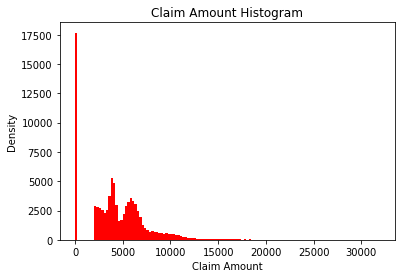

In [55]:
## for printing histogram of claim_amount with respect to density of values
bin_amount3 = (max(dfv['claim_amount']) - min(dfv['claim_amount'])) / 250
plt.hist(dfv['claim_amount'], bins=int(round(bin_amount3)),color='red')
plt.xlabel('Claim Amount')
plt.ylabel('Density')
plt.title('Claim Amount Histogram')
plt.show()

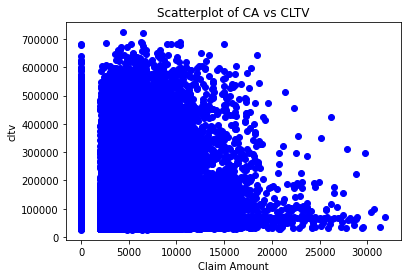

In [56]:
# scatterplot to show relationship between claim amount and cltv
plt.plot(dfv['claim_amount'], dfv['cltv'], 'bo')
plt.xlabel('Claim Amount')
plt.ylabel('cltv')
plt.title('Scatterplot of CA vs CLTV')
plt.show()

Maximum claim amount is 31894.000000 and the minimum claim_amount is 0.00

Mean of claim amount is 4351.502416 and the Median is 4089.000000

The Variance in claim amount is 10642991.302787507 and the Standard Deviation is 3262.359775

Skewness is 1.0442327522818384. Claim Amount is positive skewed and most values are concentrated on the left of the mean value, yet all the extreme values are on the right of the mean value.

Kurtosis is 3.231535360159971. Since kurtosis > 3, means Claim Amount distribution has thicker tails than normal distribution and have more outliers (extreme values).

There is a Positive Correlation of 18.03 % of claim amount with cltv. From scatter plot, it is clearly visible that on increasing claim amount , CLTV is also Increasing.But since this correlation is less than 0.2, this shows that this correlation is weak.

variation in data is cltv > claim_amount



In [60]:
dfv['vintage'].corr(dfv['cltv']) # this shows that correlation between cltv and vintage is negligible

0.020608458355182192

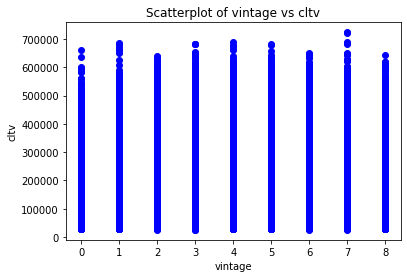

In [61]:
# scatterplot to show relationship between cltv and vintage
plt.plot(dfv['vintage'], dfv['cltv'], 'bo')
plt.xlabel('vintage')
plt.ylabel('cltv')
plt.title('Scatterplot of vintage vs cltv')
plt.show()

The positive correlation values close to zero show that that there is no strong relationship of vintage with CLV.

**Effect of gender on Customer Life Time Value (CLTV)**

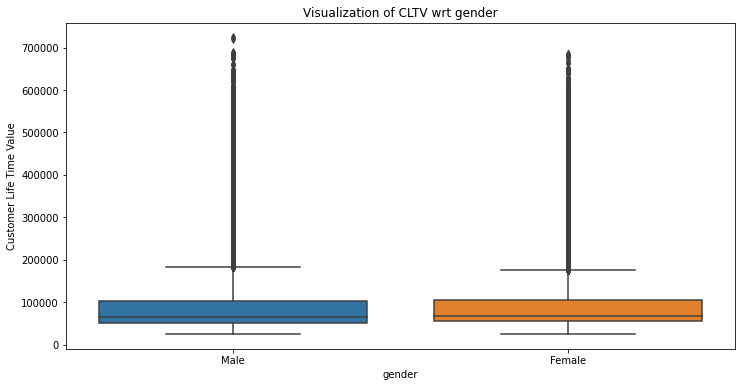

In [67]:
# CLTV IQR box for male and female
plt.figure(figsize=(12,6))
sns.boxplot(y = 'cltv' , x = 'gender', data = dfv)
plt.xlabel('gender')
plt.ylabel('Customer Life Time Value')
plt.title('Visualization of CLTV wrt gender')
plt.show()

In [68]:
df_agg = dfv.groupby('gender', as_index=False).agg({"cltv": "sum"})
df_agg # total values of male and female in the train data

,gender,cltv
0,Female,3815166912
1,Male,4941032376


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


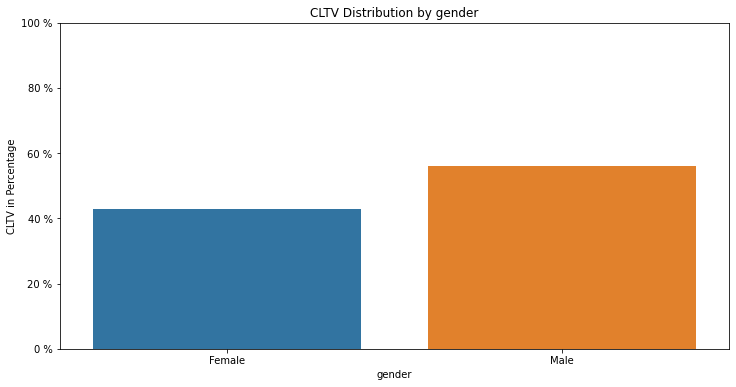

In [70]:
# bar plot for showing cltv distribution by gender
agg_arr_sum = sum(df_agg['cltv'])
agg_arr = df_agg['cltv']
percentile_agg_arr = []
df_agg['cltv'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['cltv'][1] = 100 * agg_arr[1] / agg_arr_sum

#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='gender', y='cltv', data=df_agg)
plt.xlabel('gender')
plt.ylabel('CLTV in Percentage')
plt.title('CLTV Distribution by gender')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

Male customers are comparitively more valuable. But the difference in cltv% is not much large , so we can exclude gender as a category for predicting cltv.

**Effect of area on Customer Life Time Value (CLTV)**

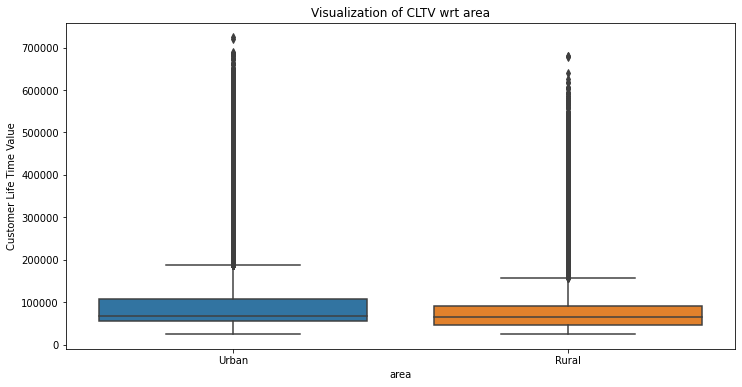

In [71]:
# CLTV IQR box for urban and rural area
plt.figure(figsize=(12,6))
sns.boxplot(y = 'cltv' , x = 'area', data = dfv)
plt.xlabel('area')
plt.ylabel('Customer Life Time Value')
plt.title('Visualization of CLTV wrt area')
plt.show()

In [72]:
df_agg = dfv.groupby('area', as_index=False).agg({"cltv": "sum"})
df_agg # total values of rural and urban area in the train data

,area,cltv
0,Rural,2143843536
1,Urban,6612355752


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


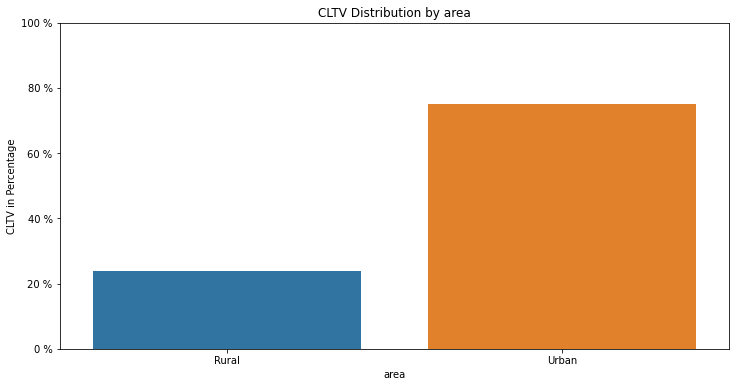

In [73]:
# bar plot for showing cltv distribution by area
agg_arr_sum = sum(df_agg['cltv'])
agg_arr = df_agg['cltv']
percentile_agg_arr = []
df_agg['cltv'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['cltv'][1] = 100 * agg_arr[1] / agg_arr_sum

#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='area', y='cltv', data=df_agg)
plt.xlabel('area')
plt.ylabel('CLTV in Percentage')
plt.title('CLTV Distribution by area')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

Customers in Urban areas are more valuable than in rural areas

**Effect of qualification on Customer Life Time Value (CLTV)**

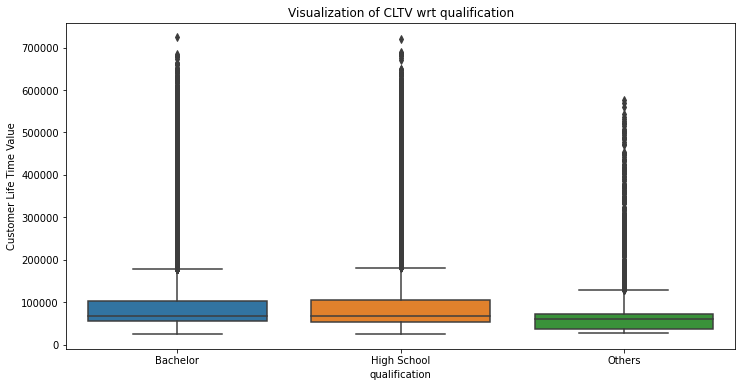

In [75]:
# CLTV IQR box for different types of qualification
plt.figure(figsize=(12,6))
sns.boxplot(y = 'cltv' , x = 'qualification', data = dfv)
plt.xlabel('qualification')
plt.ylabel('Customer Life Time Value')
plt.title('Visualization of CLTV wrt qualification')
plt.show()

In [76]:
df_agg = dfv.groupby('qualification', as_index=False).agg({"cltv": "sum"})
df_agg # total values of different types of qualification in the train data

,qualification,cltv
0,Bachelor,3881407956
1,High School,4583977092
2,Others,290814240


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


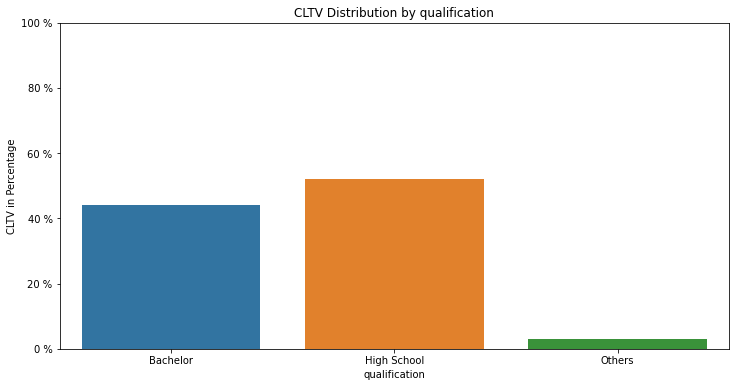

In [77]:
# bar plot for showing cltv distribution by qualification
agg_arr_sum = sum(df_agg['cltv'])
agg_arr = df_agg['cltv']
percentile_agg_arr = []
df_agg['cltv'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['cltv'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['cltv'][2] = 100 * agg_arr[2] / agg_arr_sum

#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='qualification', y='cltv', data=df_agg)
plt.xlabel('qualification')
plt.ylabel('CLTV in Percentage')
plt.title('CLTV Distribution by qualification')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

Customers with qualification as bachelor and high school are more valuable than customers with qualification as others.

**Effect of income on Customer Life Time Value (CLTV)**

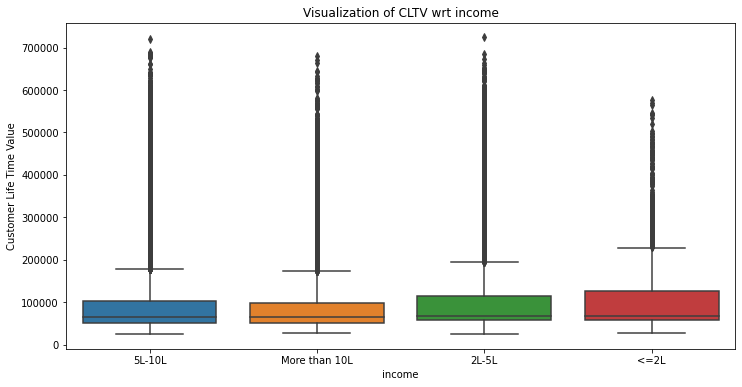

In [79]:
# CLTV IQR plot for income levels
plt.figure(figsize=(12,6))
sns.boxplot(y = 'cltv' , x = 'income', data = dfv)
plt.xlabel('income')
plt.ylabel('Customer Life Time Value')
plt.title('Visualization of CLTV wrt income')
plt.show()

In [80]:
df_agg = dfv.groupby('income', as_index=False).agg({"cltv": "sum"})
df_agg # total values for different income levels in train data

,income,cltv
0,2L-5L,2316111420
1,5L-10L,5011283472
2,<=2L,206617428
3,More than 10L,1222186968


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: Se

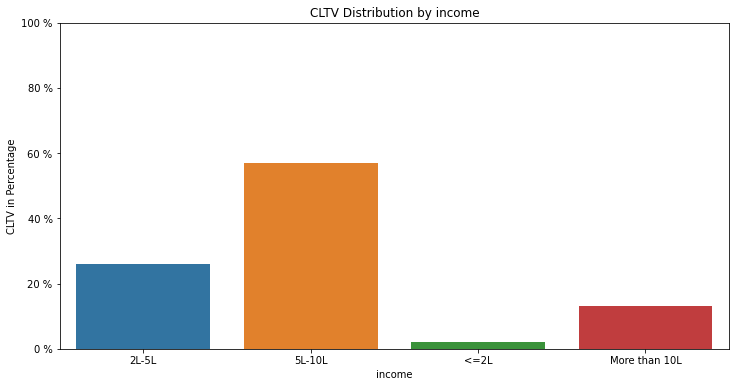

In [81]:
# bar plot for cltv distribution by income
agg_arr_sum = sum(df_agg['cltv'])
agg_arr = df_agg['cltv']
percentile_agg_arr = []
df_agg['cltv'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['cltv'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['cltv'][2] = 100 * agg_arr[2] / agg_arr_sum
df_agg['cltv'][3] = 100 * agg_arr[3] / agg_arr_sum

#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='income', y='cltv', data=df_agg)
plt.xlabel('income')
plt.ylabel('CLTV in Percentage')
plt.title('CLTV Distribution by income')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

Customers with income between 5 to 10 lakhs are more valuable than others.

**Effect of marital status on Customer Life Time Value (CLTV)**

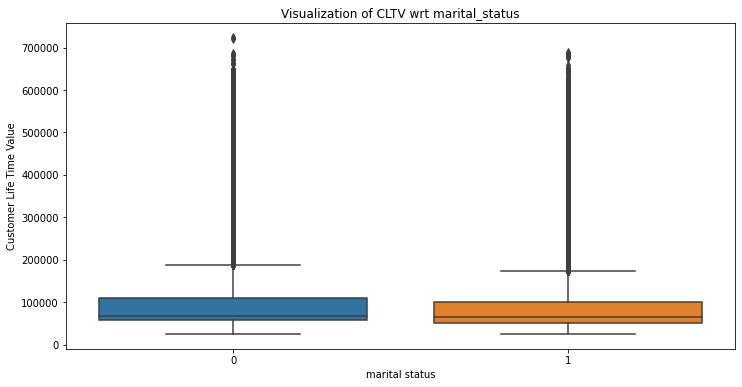

In [83]:
# CLTV IQR for marital status
plt.figure(figsize=(12,6))
sns.boxplot(y = 'cltv' , x = 'marital_status', data = dfv)
plt.xlabel('marital status')
plt.ylabel('Customer Life Time Value')
plt.title('Visualization of CLTV wrt marital_status')
plt.show()

In [84]:
df_agg = dfv.groupby('marital_status', as_index=False).agg({"cltv": "sum"})
df_agg # total values of 1 and 0 in marital status in train_data

,marital_status,cltv
0,0,4028371668
1,1,4727827620


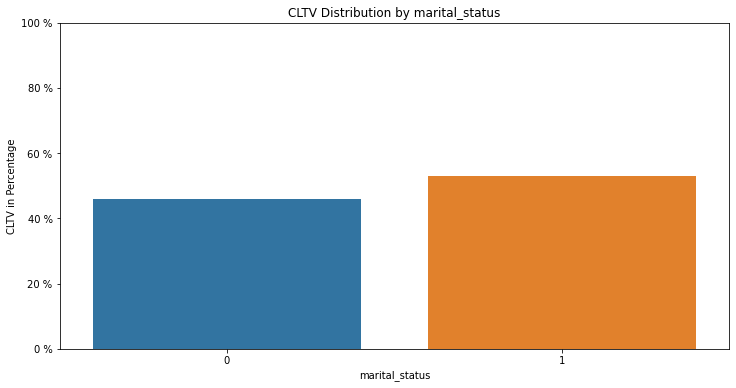

In [85]:
# bar plot cltv distribution by marital status
agg_arr_sum = sum(df_agg['cltv'])
agg_arr = df_agg['cltv']
percentile_agg_arr = []
df_agg['cltv'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['cltv'][1] = 100 * agg_arr[1] / agg_arr_sum


#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='marital_status', y='cltv', data=df_agg)
plt.xlabel('marital_status')
plt.ylabel('CLTV in Percentage')
plt.title('CLTV Distribution by marital_status')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

**Effect of num_policies on Customer Life Time Value (CLV)**

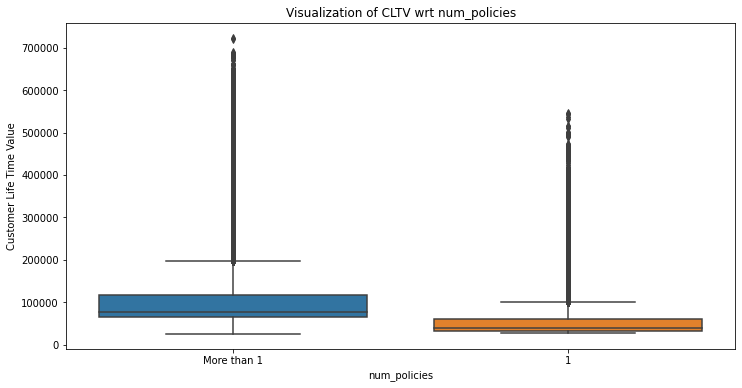

In [86]:
# IQR Visualization of CLTV wrt num_policies
plt.figure(figsize=(12,6))
sns.boxplot(y = 'cltv' , x = 'num_policies', data = dfv)
plt.xlabel('num_policies')
plt.ylabel('Customer Life Time Value')
plt.title('Visualization of CLTV wrt num_policies')
plt.show()

In [87]:
df_agg = dfv.groupby('num_policies', as_index=False).agg({"cltv": "sum"})
df_agg # total values of different types in num_policies 

,num_policies,cltv
0,1,1484968212
1,More than 1,7271231076


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


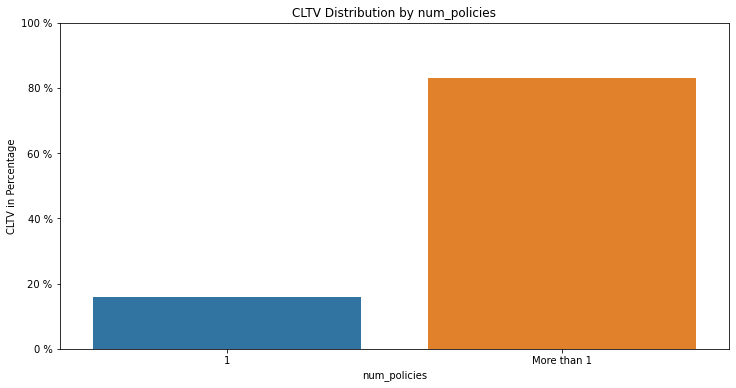

In [88]:
#CLTV Distribution by num_policies
agg_arr_sum = sum(df_agg['cltv'])
agg_arr = df_agg['cltv']
percentile_agg_arr = []
df_agg['cltv'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['cltv'][1] = 100 * agg_arr[1] / agg_arr_sum


#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='num_policies', y='cltv', data=df_agg)
plt.xlabel('num_policies')
plt.ylabel('CLTV in Percentage')
plt.title('CLTV Distribution by num_policies')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

Customers with more than 1 num_policies are more valuable.

**Effect of policy on Customer Life Time Value (CLTV)**

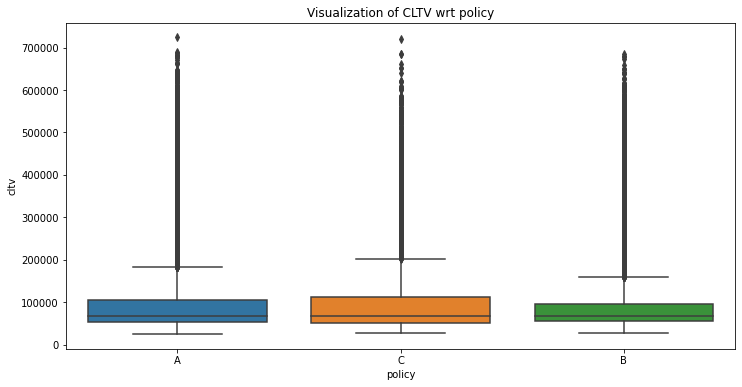

In [90]:
# IQR Visualization of CLTV wrt policy
plt.figure(figsize=(12,6))
sns.boxplot(y = 'cltv' , x = 'policy', data = dfv)
plt.xlabel('policy')
plt.ylabel('cltv')
plt.title('Visualization of CLTV wrt policy')
plt.show()

In [91]:
df_agg = dfv.groupby('policy', as_index=False).agg({"cltv": "sum"})
df_agg # number of A,B,C types of policy in train data

,policy,cltv
0,A,5685739236
1,B,2202209604
2,C,868250448


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


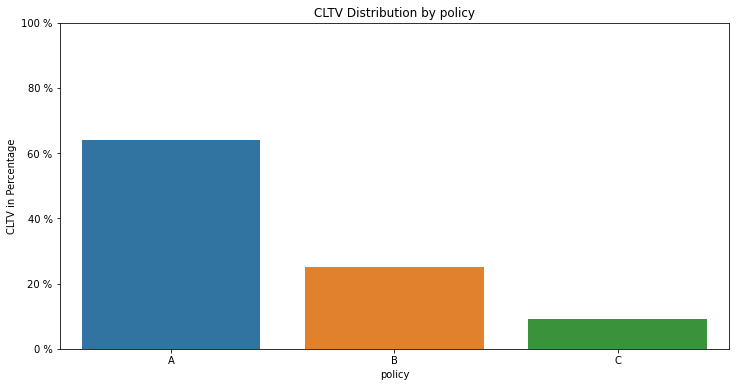

In [92]:
# CLTV Distribution by policy
agg_arr_sum = sum(df_agg['cltv'])
agg_arr = df_agg['cltv']
percentile_agg_arr = []
df_agg['cltv'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['cltv'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['cltv'][2] = 100 * agg_arr[2] / agg_arr_sum

#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='policy', y='cltv', data=df_agg)
plt.xlabel('policy')
plt.ylabel('CLTV in Percentage')
plt.title('CLTV Distribution by policy')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

Customers with policy A are more valuable than others.

**Effect of type_of_policy on Customer Life Time Value (CLTV)**

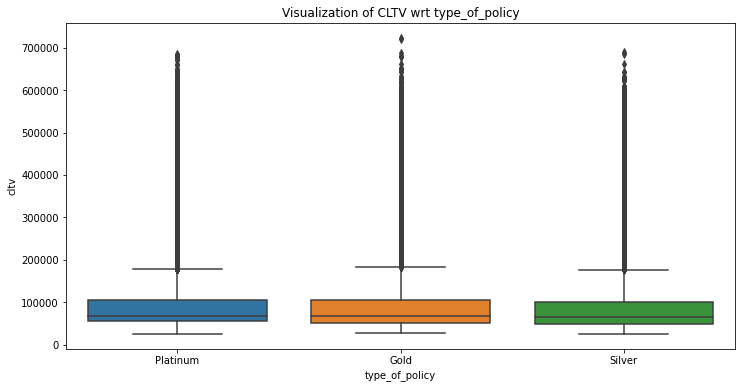

In [93]:
# IQR Visualization of CLTV wrt type_of_policy
plt.figure(figsize=(12,6))
sns.boxplot(y = 'cltv' , x = 'type_of_policy', data = dfv)
plt.xlabel('type_of_policy')
plt.ylabel('cltv')
plt.title('Visualization of CLTV wrt type_of_policy')
plt.show()

In [94]:
df_agg = dfv.groupby('type_of_policy', as_index=False).agg({"cltv": "sum"})
df_agg # number of different types of type_of_policy

,type_of_policy,cltv
0,Gold,2045877504
1,Platinum,4767792492
2,Silver,1942529292


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


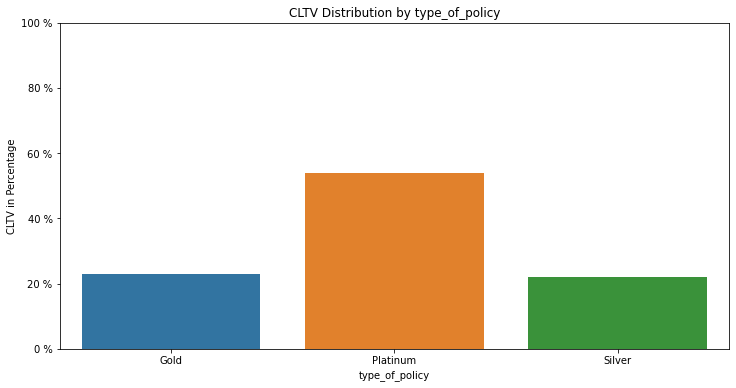

In [95]:
# CLTV Distribution by type_of_policy
agg_arr_sum = sum(df_agg['cltv'])
agg_arr = df_agg['cltv']
percentile_agg_arr = []
df_agg['cltv'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['cltv'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['cltv'][2] = 100 * agg_arr[2] / agg_arr_sum

#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='type_of_policy', y='cltv', data=df_agg)
plt.xlabel('type_of_policy')
plt.ylabel('CLTV in Percentage')
plt.title('CLTV Distribution by type_of_policy')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

Customers with type of policy as Platinum are more valuable than others.

In [228]:
dff=dfv.copy() # making a copy of dfv dataframe

In [229]:
dff.drop(['gender','marital_status'],axis=1,inplace = True) # removing gender and marital status column as they dont impact cltv much.

In [230]:
# one hot encoding for categorical features
df_clv = pd.get_dummies(dff,columns=['area','policy','qualification','type_of_policy','income','vintage','num_policies'])

**Model 1**

In [ ]:
# model 1
import statsmodels.api as sm 

y = df_clv['cltv'] # dependent variable 
x = df_clv.drop('cltv',axis=1) # features

In [153]:
# doing train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 450)

print('Train Data Count: {}'.format(X_train.shape[0]))
print('Test Data Count: {}'.format(X_test.shape[0]))

X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit() # fitting linear regression model using Ordinary Least Squares
results.summary()

Train Data Count: 62574
Test Data Count: 26818


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cltv   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     557.6
Date:                Sun, 22 Jan 2023   Prob (F-statistic):               0.00
Time:                        07:30:23   Log-Likelihood:            -7.9754e+05
No. Observations:               62574   AIC:                         1.595e+06
Df Residuals:                   62553   BIC:                         1.595e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2.159e+04    295.273     73.126      0.000     2.1e+04    2.22e+04
claim_amount                  2.7616      0.115     23.955      0.000       2.536       2.988
area_Rural                 7459.7021    438.632     17.007      0.000    6599.982    8319.422
area_Urban                 1.413e+04    445.742     31.705      0.000    1.33e+04     1.5e+04
policy_A                   6178.8704    505.984     12.212      0.000    5187.142    7170.599
policy_B                   -806.0700    587.079     -1.373      0.170   -1956.746     344.606
policy_C                   1.622e+04    814.402     19.915      0.000    1.46e+04    1.78e+04
qualification_Bachelor     9788.6028    625.449     15.651      0.000    8562.721     1.1e+04
qualification_High School  9040.6149    616.847     14.656      0.000    7831.594    1.02e+04
qualification_Others       2762.7634   1158.925      2.384      0.017     491.267    5034.260
type_of_policy_Gold        8666.7185    554.107     15.641      0.000    7580.667    9752.770
type_of_policy_Platinum    7270.8981    447.490     16.248      0.000    6393.816    8147.980
type_of_policy_Silver      5654.3646    548.193     10.315      0.000    4579.905    6728.824
income_2L-5L               9876.8794    796.759     12.396      0.000    8315.230    1.14e+04
income_5L-10L              5217.0642    687.145      7.592      0.000    3870.258    6563.870
income_<=2L                3922.9293   1824.126      2.151      0.032     347.640    7498.219
income_More than 10L       2575.1083    884.076      2.913      0.004     842.318    4307.899
vintage_0                  -320.1975   1427.587     -0.224      0.823   -3118.270    2477.875
vintage_1                   955.9558   1062.494      0.900      0.368   -1126.535    3038.446
vintage_2                  1845.1419    986.561      1.870      0.061     -88.520    3778.804
vintage_3                  4958.3155   1100.533      4.505      0.000    2801.268    7115.363
vintage_4                  3253.9861    926.685      3.511      0.000    1437.682    5070.290
vintage_5                  1349.8664    863.335      1.564      0.118    -342.271    3042.004
vintage_6                  2626.3858    745.394      3.523      0.000    1165.413    4087.359
vintage_7                  3087.7600    847.434      3.644      0.000    1426.788    4748.732
vintage_8                  3834.7672   1075.241      3.566      0.000    1727.294    5942.241
num_policies_1            -2.167e+04    396.374    -54.668      0.000   -2.24e+04   -2.09e+04
num_policies_More than 1   4.326e+04    386.385    111.964      0.000    4.25e+04     4.4e+04
==============================================================================
Omnibus:                    35868.308   Durbin-Watson:                   2.014
Prob(Omnibu

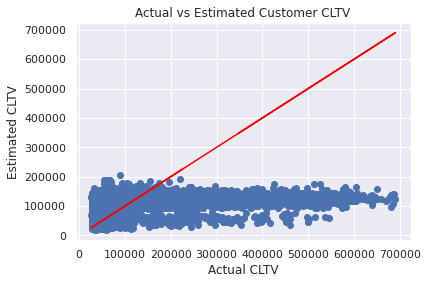

In [154]:
# Model graph to see predictions


X_test = sm.add_constant(X_test)

y_pred = results.predict(X_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual CLTV")
plt.ylabel("Estimated CLTV", )
plt.title("Actual vs Estimated Customer CLTV")
plt.show()

**Model 2:**

In [255]:
#duplicate the original data and get the log version of it to be able to reach higher R2(with outliers)
df2 = df_clv.copy()

y = np.log(df2['cltv'])

import statsmodels.api as sm


X2 =  df2.drop('cltv',axis=1)

In [256]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.30, random_state = 450)

print('Train Data Count: {}'.format(X2_train.shape[0]))
print('Test Data Count: {}'.format(X2_test.shape[0]))

X2_train = sm.add_constant(X2_train)
results_log = sm.OLS(y_train, X2_train).fit()
results_log.summary()

Train Data Count: 62574
Test Data Count: 26818


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cltv   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     1443.
Date:                Sun, 22 Jan 2023   Prob (F-statistic):               0.00
Time:                        09:45:32   Log-Likelihood:                -49887.
No. Observations:               62574   AIC:                         9.982e+04
Df Residuals:                   62553   BIC:                         1.000e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         3.2742      0.002   1713.888      0.000       3.271       3.278
claim_amount               2.023e-05   7.46e-07     27.116      0.000    1.88e-05    2.17e-05
area_Rural                    1.6204      0.003    570.960      0.000       1.615       1.626
area_Urban                    1.6539      0.003    573.477      0.000       1.648       1.660
policy_A                      1.0842      0.003    331.191      0.000       1.078       1.091
policy_B                      1.0429      0.004    274.555      0.000       1.035       1.050
policy_C                      1.1471      0.005    217.708      0.000       1.137       1.157
qualification_Bachelor        1.1170      0.004    276.020      0.000       1.109       1.125
qualification_High School     1.1096      0.004    278.029      0.000       1.102       1.117
qualification_Others          1.0477      0.007    139.722      0.000       1.033       1.062
type_of_policy_Gold           1.1009      0.004    307.079      0.000       1.094       1.108
type_of_policy_Platinum       1.0938      0.003    377.800      0.000       1.088       1.100
type_of_policy_Silver         1.0795      0.004    304.360      0.000       1.073       1.086
income_2L-5L                  0.8485      0.005    164.594      0.000       0.838       0.859
income_5L-10L                 0.8171      0.004    183.778      0.000       0.808       0.826
income_<=2L                   0.8069      0.012     68.371      0.000       0.784       0.830
income_More than 10L          0.8018      0.006    140.172      0.000       0.791       0.813
vintage_0                     0.3381      0.009     36.601      0.000       0.320       0.356
vintage_1                     0.3451      0.007     50.206      0.000       0.332       0.359
vintage_2                     0.3611      0.006     56.576      0.000       0.349       0.374
vintage_3                     0.3831      0.007     53.803      0.000       0.369       0.397
vintage_4                     0.3696      0.006     61.644      0.000       0.358       0.381
vintage_5                     0.3541      0.006     63.387      0.000       0.343       0.365
vintage_6                     0.3639      0.005     75.455      0.000       0.354       0.373
vintage_7                     0.3711      0.005     67.681      0.000       0.360       0.382
vintage_8                     0.3882      0.007     55.797      0.000       0.375       0.402
num_policies_1                1.2759      0.003    497.530      0.000       1.271       1.281
num_policies_More than 1      1.9983      0.002    799.348      0.000       1.993       2.003
==============================================================================
Omnibus:                    10236.517   Durbin-Watson:                   2.007
Prob(Omnibu

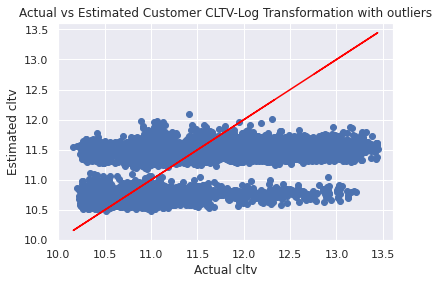

In [257]:
# Model graph to see predictions


X2_test = sm.add_constant(X2_test)

y_pred = results_log.predict(X2_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual cltv")
plt.ylabel("Estimated cltv", )
plt.title("Actual vs Estimated Customer CLTV-Log Transformation with outliers")
plt.show()

**Model 3**

In [258]:
#duplicate the original data and winsorize the data at %5
df3 = df_clv.copy()

df3['cltv'] = winsorize(df3['cltv'],(0, 0.05))


y = df3['cltv']
X3 =  df3.drop('cltv',axis=1)

In [259]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size = 0.30, random_state = 450)

print('Train Data Count: {}'.format(X3_train.shape[0]))
print('Test Data Count: {}'.format(X3_test.shape[0]))


X3_train = sm.add_constant(X3_train)
results_wins = sm.OLS(y_train, X3_train).fit()
results_wins.summary()

Train Data Count: 62574
Test Data Count: 26818


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cltv   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     742.2
Date:                Sun, 22 Jan 2023   Prob (F-statistic):               0.00
Time:                        09:46:47   Log-Likelihood:            -7.8120e+05
No. Observations:               62574   AIC:                         1.562e+06
Df Residuals:                   62553   BIC:                         1.563e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2.124e+04    227.398     93.388      0.000    2.08e+04    2.17e+04
claim_amount                  2.2539      0.089     25.386      0.000       2.080       2.428
area_Rural                 7990.5481    337.804     23.654      0.000    7328.451    8652.645
area_Urban                 1.325e+04    343.280     38.586      0.000    1.26e+04    1.39e+04
policy_A                   6146.4370    389.673     15.773      0.000    5382.677    6910.197
policy_B                    494.5298    452.127      1.094      0.274    -391.641    1380.700
policy_C                    1.46e+04    627.195     23.271      0.000    1.34e+04    1.58e+04
qualification_Bachelor     8946.9318    481.678     18.575      0.000    8002.843    9891.021
qualification_High School  8887.9834    475.052     18.709      0.000    7956.880    9819.087
qualification_Others       3401.3447    892.524      3.811      0.000    1651.997    5150.693
type_of_policy_Gold        8458.9227    426.735     19.822      0.000    7622.521    9295.324
type_of_policy_Platinum    7176.4220    344.626     20.824      0.000    6500.955    7851.889
type_of_policy_Silver      5600.9153    422.180     13.267      0.000    4773.442    6428.389
income_2L-5L               8933.4107    613.608     14.559      0.000    7730.737    1.01e+04
income_5L-10L              4753.9382    529.191      8.983      0.000    3716.722    5791.154
income_<=2L                4996.6246   1404.814      3.557      0.000    2243.186    7750.063
income_More than 10L       2552.2864    680.854      3.749      0.000    1217.812    3886.761
vintage_0                   -91.6974   1099.428     -0.083      0.934   -2246.578    2063.183
vintage_1                  1086.0233    818.259      1.327      0.184    -517.766    2689.812
vintage_2                  2116.7224    759.781      2.786      0.005     627.551    3605.894
vintage_3                  4374.1441    847.554      5.161      0.000    2712.936    6035.352
vintage_4                  3031.8584    713.668      4.248      0.000    1633.068    4430.649
vintage_5                  1683.0371    664.880      2.531      0.011     379.871    2986.204
vintage_6                  2504.5344    574.050      4.363      0.000    1379.395    3629.674
vintage_7                  2722.1218    652.634      4.171      0.000    1442.957    4001.287
vintage_8                  3809.5160    828.075      4.600      0.000    2186.487    5432.545
num_policies_1            -1.873e+04    305.260    -61.349      0.000   -1.93e+04   -1.81e+04
num_policies_More than 1   3.996e+04    297.567    134.302      0.000    3.94e+04    4.05e+04
==============================================================================
Omnibus:                    21122.828   Durbin-Watson:                   2.012
Prob(Omnibu

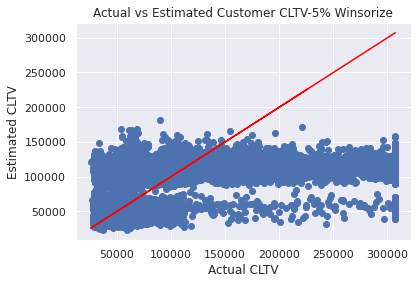

In [260]:
X3_test = sm.add_constant(X3_test)

y_pred = results_wins.predict(X3_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual CLTV")
plt.ylabel("Estimated CLTV", )
plt.title("Actual vs Estimated Customer CLTV-5% Winsorize")
plt.show()

**Model 4**

In [377]:
#the best model is the one with log transformation and outliers excluded

#Let's use polynomial features to see if we can do better

df4 = df3.copy()

y = np.log(df4['cltv'])
X4 =df4.drop('cltv',axis=1)

pol = PolynomialFeatures()


array = pol.fit_transform(X4)

df_pol = pd.DataFrame(array)
df_pol.columns = pol.get_feature_names(X4.columns)
df_pol

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,claim_amount,area_Rural,area_Urban,policy_A,policy_B,policy_C,qualification_Bachelor,qualification_High School,qualification_Others,...,vintage_7^2,vintage_7 vintage_8,vintage_7 num_policies_1,vintage_7 num_policies_More than 1,vintage_8^2,vintage_8 num_policies_1,vintage_8 num_policies_More than 1,num_policies_1^2,num_policies_1 num_policies_More than 1,num_policies_More than 1^2
0,1.0,5790.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,5080.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,2599.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,3508.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89387,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
89388,1.0,3897.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
89389,1.0,3363.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
89390,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [378]:
X4_train, X4_test, y_train, y_test = train_test_split(df_pol, y, test_size = 0.30, random_state = 450)

print('Train Data Count: {}'.format(X4_train.shape[0]))
print('Test Data Count: {}'.format(X4_test.shape[0]))


X4_train = sm.add_constant(X4_train)
results = sm.OLS(y_train, X4_train).fit()
results.summary()

Train Data Count: 62574
Test Data Count: 26818


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cltv   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     182.9
Date:                Sun, 22 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:45:50   Log-Likelihood:                -45263.
No. Observations:               62574   AIC:                         9.088e+04
Df Residuals:                   62396   BIC:                         9.249e+04
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
1                                                      1.3635      0.003    494.389      0.000       1.358       1.369
claim_amount                                        6.877e-06   7.07e-07      9.722      0.000    5.49e-06    8.26e-06
area_Rural                                             0.6852      0.006    113.031      0.000       0.673       0.697
area_Urban                                             0.6783      0.004    166.925      0.000       0.670       0.686
policy_A                                               0.4564      0.002    202.876      0.000       0.452       0.461
policy_B                                               0.4542      0.003    161.110      0.000       0.449       0.460
policy_C                                               0.4530      0.004    126.603      0.000       0.446       0.460
qualification_Bachelor                                 0.4616      0.002    187.099      0.000       0.457       0.466
qualification_High School                              0.4589      0.002    193.029      0.000       0.454       0.464
qualification_Others                                   0.4431      0.005     96.710      0.000       0.434       0.452
type_of_policy_Gold                                    0.4542      0.003    166.212      0.000       0.449       0.460
type_of_policy_Platinum                                0.4528      0.002    208.885      0.000       0.449       0.457
type_of_policy_Silver                                  0.4565      0.002    184.546      0.000       0.452       0.461
income_2L-5L                                           0.3439      0.005     69.125      0.000       0.334       0.354
income_5L-10L                                          0.3447      0.005     73.802      0.000       0.336       0.354
income_<=2L                                            0.3376      0.016     21.189      0.000       0.306       0.369
income_More than 10L                                   0.3373      0.005     67.182      0.000       0.327       0.347
vintage_0                                              0.1465      0.006     22.555      0.000       0.134       0.159
vintage_1                                              0.1494      0.005     33.017      0.000       0.141       0.158
vintage_2                                              0.1456      0.004     35.132      0.000       0.137       0.154
vintage_3                                              0.1593      0.005     34.108      0.000       0.150       0.168
vintage_4                                              0.1598      0.004     41.563      0.000       0.152       0.167
vintage_5                                              0.1477      0.004     40.907      0.000       0.141  

**Model 4 is giving us r2_score as 0.342 which is best among all models. So we will using this model for predicting CLTV of test data.**

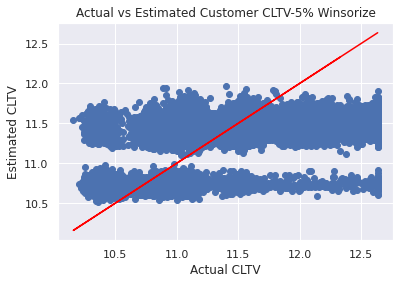

In [366]:
X4_test = sm.add_constant(X4_test)

y_pred = results.predict(X4_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual CLTV")
plt.ylabel("Estimated CLTV", )
plt.title("Actual vs Estimated Customer CLTV-5% Winsorize")
plt.show()

**CLTV prediction for test data**

In [367]:
test_data=pd.read_csv('/kaggle/input/vimaanbima/test.csv') # loading test data as pandas dataframe

In [368]:
df=test_data.drop(['id','gender','marital_status'],axis=1) # dropping unimportant columns

In [369]:
# one hot encoding for categorical columns
X_test = pd.get_dummies(df,columns=['area','policy','qualification','type_of_policy','income','vintage','num_policies'])

In [370]:
pol = PolynomialFeatures()


array = pol.fit_transform(X_test)

df_pol = pd.DataFrame(array)
df_pol.columns = pol.get_feature_names(X_test.columns)
df_pol

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,claim_amount,area_Rural,area_Urban,policy_A,policy_B,policy_C,qualification_Bachelor,qualification_High School,qualification_Others,...,vintage_7^2,vintage_7 vintage_8,vintage_7 num_policies_1,vintage_7 num_policies_More than 1,vintage_8^2,vintage_8 num_policies_1,vintage_8 num_policies_More than 1,num_policies_1^2,num_policies_1 num_policies_More than 1,num_policies_More than 1^2
0,1.0,2134.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,4102.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,2925.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,14059.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59590,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59591,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59592,1.0,3323.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
59593,1.0,2886.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [371]:
y_pred=results.predict(df_pol) # prediction

In [372]:
exp_ypred = np.exp(y_pred) # getting true value of  predicted cltv as y_pred is the log value

In [373]:
test_data=pd.read_csv('/kaggle/input/vimaanbima/test.csv')

In [374]:
test_data['cltv']=exp_ypred # adding cltv data in test data

In [376]:
sample_submission = test_data[['id','cltv']]
sample_submission.to_csv("sample_submission.csv",index=False) # saving submissions file